## Step 1: Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
from sklearn.ensemble import RandomForestClassifier

## Step 2: loading data set

In [3]:
web_phising=pd.read_csv(r"C:\Users\Mahima\Downloads\web page phishing detection.csv", na_values=['',' '])

## Step 3: Data preprocessing & EDA

In [4]:
web_phising.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
web_phising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
web_phising.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [7]:
web_phising.columns.values

array(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots',
       'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
       'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 

In [8]:
# removing url column its not for use
web_phising.drop('url', axis=1,inplace=True)

In [9]:
# lebal encoding to status column
web_phising['status'] = web_phising['status'].map({'legitimate': 0, 'phishing': 1})

In [10]:
web_phising.head(20)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
5,32,24,0,3,1,0,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,1
6,19,12,0,2,0,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,0
7,81,27,1,2,0,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,1
8,42,34,0,2,0,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,0
9,104,10,0,1,10,0,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,0


In [11]:
# checking for null values
web_phising.isnull().sum().head(30)

length_url           0
length_hostname      0
ip                   0
nb_dots              0
nb_hyphens           0
nb_at                0
nb_qm                0
nb_and               0
nb_or                0
nb_eq                0
nb_underscore        0
nb_tilde             0
nb_percent           0
nb_slash             0
nb_star              0
nb_colon             0
nb_comma             0
nb_semicolumn        0
nb_dollar            0
nb_space             0
nb_www               0
nb_com               0
nb_dslash            0
http_in_path         0
https_token          0
ratio_digits_url     0
ratio_digits_host    0
punycode             0
port                 0
tld_in_path          0
dtype: int64

<Axes: >

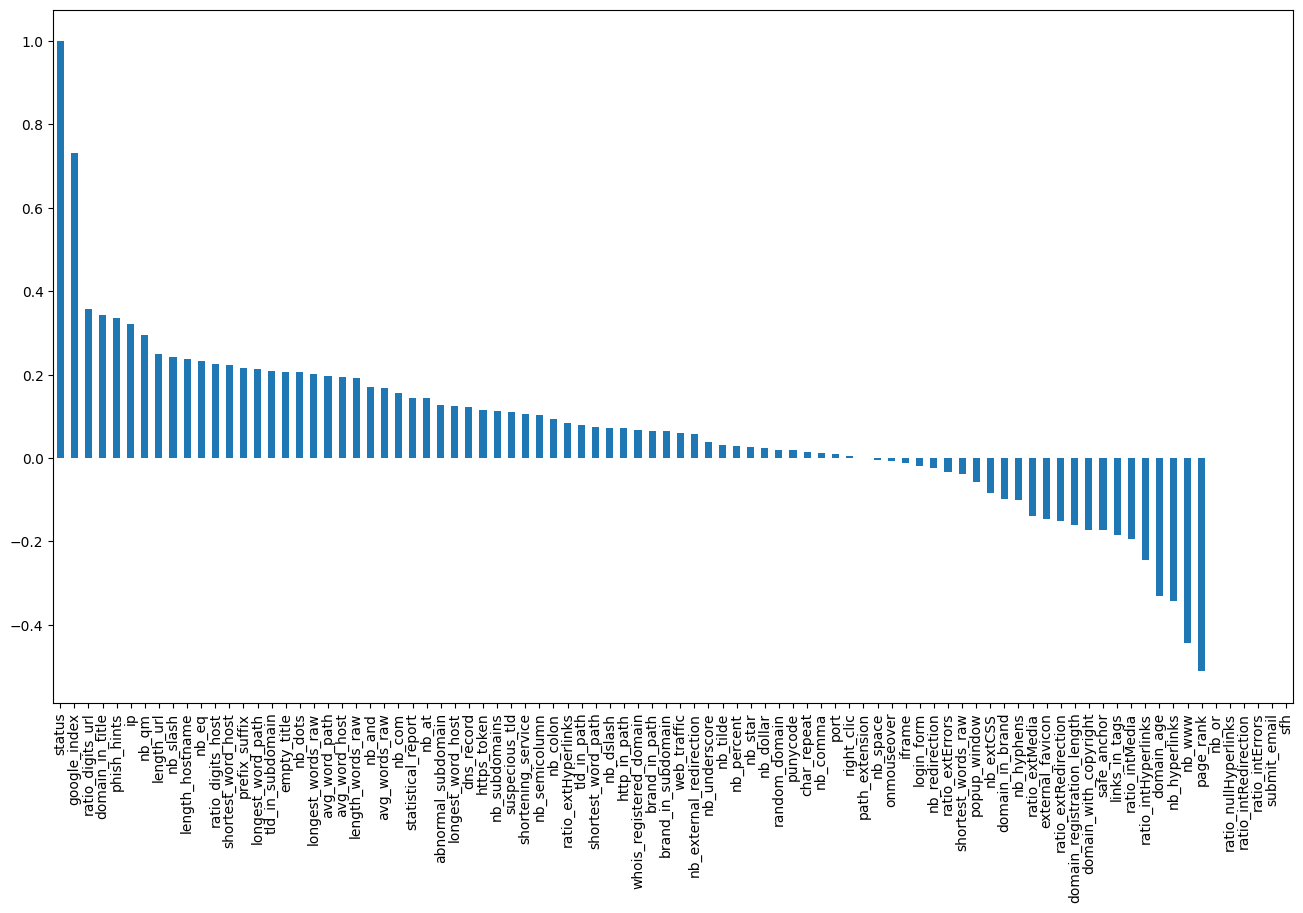

In [12]:
# Get Correlation of "status" with other variables

plt.figure(figsize=(16,9))
web_phising.corr()['status'].sort_values(ascending = False).plot(kind='bar')

'''The correlation plot shows how each feature relates to the phishing status.
Features like length_url, nb_subdomain, and ratio_external_hyperlinks are positively correlated with phishing, indicating that longer URLs and more subdomains increase phishing likelihood.
Conversely, features such as https_token, page_rank, and submit_email show negative correlation, meaning they are more common in legitimate websites.
Therefore, positive features act as phishing indicators, while negative ones help identify safe websites.'''

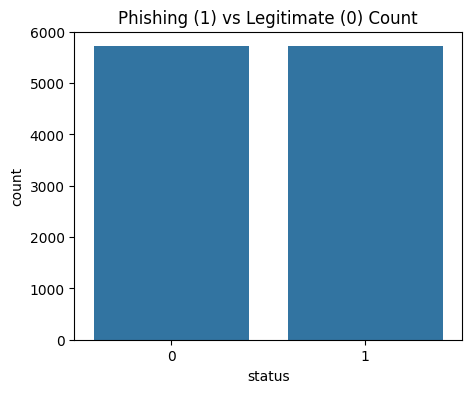

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='status', data=web_phising)
plt.title("Phishing (1) vs Legitimate (0) Count")
plt.show()


The count plot shows that the dataset is nearly balanced, with an almost equal number of legitimate (0) and phishing (1) samples.
This balance helps ensure that the classification model can learn to detect both phishing and legitimate websites effectively.

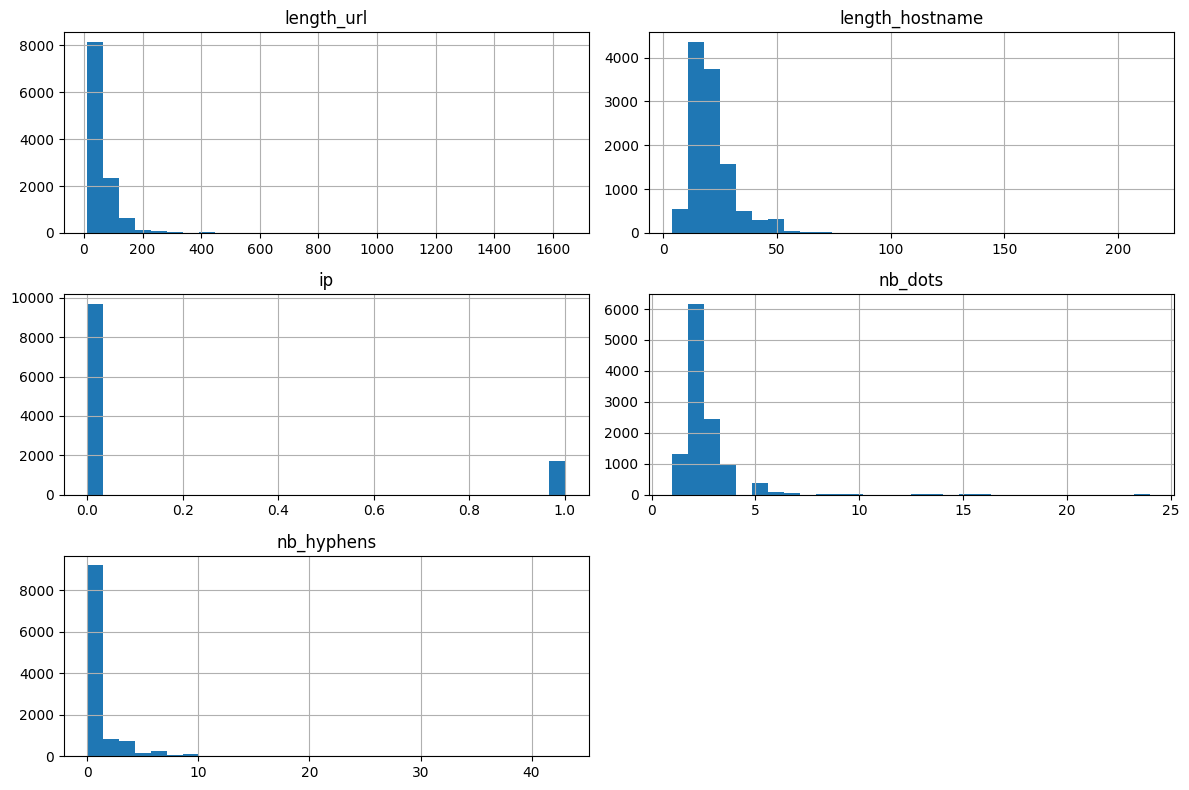

In [14]:
numeric_cols = web_phising.select_dtypes(include=['int64', 'float64']).columns

# Example for first few numeric columns
web_phising[numeric_cols[:5]].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()


📊 Feature Distributions Interpretation
🔹 1. length_url

a) Most URLs have small lengths (below ~100).

b) Few URLs are extremely long (outliers).

Interpretation:
Phishing websites often use longer URLs to hide malicious parts, while legitimate ones are shorter and cleaner.

2. length_hostname

a) Most hostnames are short (<50 characters).

b)Some long hostnames exist but are rare.

Interpretation:
Phishing URLs sometimes include long or complex hostnames to mimic legitimate domains.

3. ip

a) Most values are near 0, with a small spike at 1.

Interpretation:
This suggests most URLs don’t directly use IP addresses, but a few do — and those are often phishing URLs (since legit sites usually use domain names).

4. nb_dots

a) Most URLs have few dots (1–3).

b) Some URLs have many dots (outliers).

Interpretation:
A higher number of dots often indicates phishing — subdomains used to confuse users (like login.security.bank.example.com).

5. nb_hyphens

a)Most URLs have 0–2 hyphens.

b)A few URLs have many hyphens.

Interpretation:
Phishing URLs frequently use hyphens to imitate trusted sites (e.g., pay-pal-login.com).

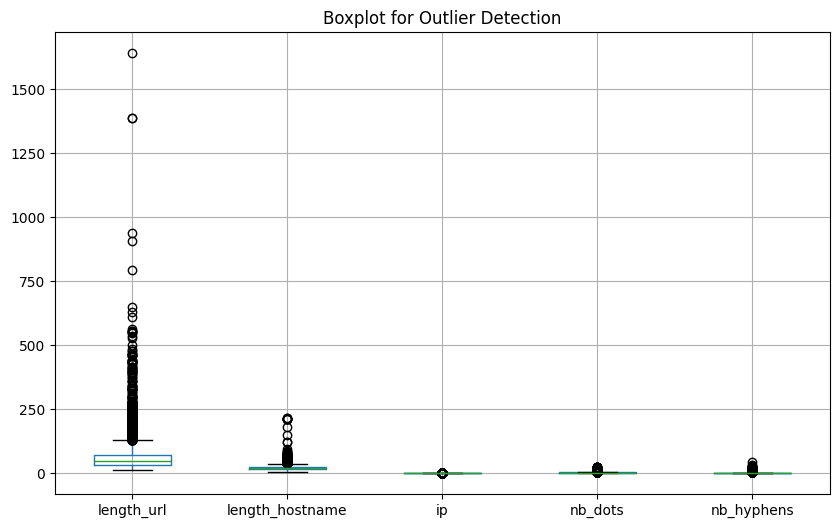

In [15]:
## checking outliers in features 
num_cols = ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens']
plt.figure(figsize=(10,6))
web_phising[num_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()


In [16]:
for col in num_cols:
    Q1 = web_phising[col].quantile(0.25)
    Q3 = web_phising[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = web_phising[(web_phising[col] < lower_bound) | (web_phising[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


length_url: 620 outliers
length_hostname: 775 outliers
ip: 1721 outliers
nb_dots: 567 outliers
nb_hyphens: 1371 outliers


In [17]:
web_phising.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


### Outlier Detection Interpretation

Through the boxplot analysis, several outliers were identified in the columns —
length_url, length_hostname, ip, nb_dots, and nb_hyphens.

The presence of these outliers is expected because phishing URLs often exhibit unusual characteristics,
such as excessively long URLs, multiple subdomains, IP-based links, or an unusually high number of hyphens and dots.

⚙️ Therefore, the outliers were not removed from the dataset,
as they can provide valuable information to distinguish between phishing and legitimate URLs.
Removing them might result in the loss of important patterns relevant for classification.

Instead, numerical features will be scaled before model training to reduce the influence of extreme values
while preserving their informational significance.

# Model Builidng
## Step 4: Model training

In [18]:
x= web_phising.drop('status',axis=1)
y=web_phising['status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [19]:
x.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [20]:
y.head(10)

0    0
1    1
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: status, dtype: int64

In [21]:
scaler= StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

In [22]:
## fitting model

### Hyperparameters

In [23]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],  # fastest + supports both l1/l2
    'max_iter': [500]
}

In [27]:
lr=LogisticRegression()
grid_lr=GridSearchCV(estimator=lr,param_grid=param_grid_lr,cv=5,scoring=classification_report)

In [28]:
grid_lr.fit(x_train_std,y_train)

c:\Users\Mahima\OneDrive\Desktop\Cyberwaltcompany\cyberdefence_model\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Mahima\OneDrive\Desktop\Cyberwaltcompany\cyberdefence_model\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Mahima\OneDrive\Desktop\Cyberwaltcompany\cyberdefence_model\Lib\site-packages\sklearn\utils\_param_validation.py", line 196, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mahima\anaconda3\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mahima\anaconda3\Lib\inspect.py",

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [500], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,<function cla...0023511C556C0>
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [29]:
print("Best_parameters:",grid_lr.best_params_)
print("Best cross validation score:",grid_lr.best_score_)

best_lr=grid_lr.best_estimator_
y_pred_lr_best = best_lr.predict(x_test_std)

print("Test Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print(classification_report(y_test, y_pred_lr_best))

Best_parameters: {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross validation score: nan
Test Accuracy: 0.9186351706036745
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1143
           1       0.92      0.92      0.92      1143

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



Interpretation (for report or presentation)

The Logistic Regression model, after hyperparameter tuning using GridSearchCV, achieved an accuracy of 91.86% on the test data.
The model performed equally well on both phishing (class 1) and legitimate (class 0) URLs, indicating balanced precision and recall.
The use of L1 regularization helped in reducing overfitting and selecting the most relevant features, while the liblinear solver ensured efficient computation.

In [31]:
## Training model on random forest 
rf=RandomForestClassifier(n_estimators=200,max_depth=20,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_lr_best = best_lr.predict(x_test_std)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_best))

print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr_best))

Random Forest Accuracy: 0.962817147856518
Logistic Regression Accuracy: 0.9186351706036745

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1143
           1       0.96      0.97      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1143
           1       0.92      0.92      0.92      1143

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



Interpretation

a)The Random Forest model achieved an overall accuracy of 96.28%, outperforming the tuned Logistic Regression model (91.86%).

b)Random Forest demonstrated better precision and recall, indicating superior capability to correctly identify both phishing and legitimate URLs.

c)Logistic Regression, while slightly less accurate, remained a strong interpretable baseline model—useful for understanding which features contribute most to phishing detection.

d)The F1-scores (0.96 vs 0.92) show that Random Forest is more balanced and reliable across both classes.

Conclusion

Both models effectively detect phishing websites, but Random Forest delivers higher predictive accuracy and robustness.
Logistic Regression provides simplicity and interpretability, making it valuable for model explainability and feature insights.
However, for real-world deployment in a phishing detection system—where accuracy and recall are critical to minimize false negatives—the Random Forest model is selected as the final choice.

Random Forest improved the detection performance by approximately 4.4% over the tuned Logistic Regression model.